In [1]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torch.optim as optim
import torchvision.datasets as datasets
import imageio
import numpy as np
import matplotlib
from torchvision.utils import make_grid, save_image
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt
from tqdm import tqdm

# Define learning parameters

In [2]:
# learning parameters
batch_size = 512
epochs = 100
sample_size = 64 # fixed sample size for generator
nz = 128 # latent vector size
k = 1 # number of steps to apply to the discriminator
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Prepare training dataset

In [3]:
transform = transforms.Compose([
                                transforms.ToTensor(),
                                transforms.Normalize((0.5,),(0.5,)),
])
to_pil_image = transforms.ToPILImage()

# Make input, output folders
!mkdir -p input
!mkdir -p p1c_vs_outputs_tmp

# Load train data
train_data = datasets.MNIST(
    root='input/data',
    train=True,
    download=True,
    transform=transform
)
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)

A subdirectory or file -p already exists.
Error occurred while processing: -p.
A subdirectory or file input already exists.
Error occurred while processing: input.
A subdirectory or file -p already exists.
Error occurred while processing: -p.
A subdirectory or file p1c_vs_outputs_tmp already exists.
Error occurred while processing: p1c_vs_outputs_tmp.


# Generator

In [4]:
class Generator(nn.Module):
    def __init__(self, nz):
        super(Generator, self).__init__()
        self.nz = nz
        self.main = nn.Sequential(
            nn.Linear(self.nz, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 1024),
            nn.LeakyReLU(0.2),
            nn.Linear(1024, 784),
            nn.Tanh(),
        )
    def forward(self, x):
        return self.main(x).view(-1, 1, 28, 28)

# Discriminator

In [5]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.n_input = 784
        self.main = nn.Sequential(
            nn.Linear(self.n_input, 1024),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid(),
        )
    def forward(self, x):
        x = x.view(-1, 784)
        return self.main(x)

In [6]:
generator = Generator(nz).to(device)
discriminator = Discriminator().to(device)
print('##### GENERATOR #####')
print(generator)
print('######################')
print('\n##### DISCRIMINATOR #####')
print(discriminator)
print('######################')

##### GENERATOR #####
Generator(
  (main): Sequential(
    (0): Linear(in_features=128, out_features=256, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Linear(in_features=256, out_features=512, bias=True)
    (3): LeakyReLU(negative_slope=0.2)
    (4): Linear(in_features=512, out_features=1024, bias=True)
    (5): LeakyReLU(negative_slope=0.2)
    (6): Linear(in_features=1024, out_features=784, bias=True)
    (7): Tanh()
  )
)
######################

##### DISCRIMINATOR #####
Discriminator(
  (main): Sequential(
    (0): Linear(in_features=784, out_features=1024, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Dropout(p=0.3, inplace=False)
    (3): Linear(in_features=1024, out_features=512, bias=True)
    (4): LeakyReLU(negative_slope=0.2)
    (5): Dropout(p=0.3, inplace=False)
    (6): Linear(in_features=512, out_features=256, bias=True)
    (7): LeakyReLU(negative_slope=0.2)
    (8): Dropout(p=0.3, inplace=False)
    (9): Linear(in_features=256, out_features=1

# Tools for training

In [7]:
# optimizers
optim_g = optim.Adam(generator.parameters(), lr=0.0002)
optim_d = optim.Adam(discriminator.parameters(), lr=0.0002)

In [8]:
# loss function
criterion = nn.BCELoss() # Binary Cross Entropy loss

In [9]:
losses_g = [] # to store generator loss after each epoch
losses_d = [] # to store discriminator loss after each epoch
images = [] # to store images generatd by the generator

In [10]:
# to create real labels (1s)
def label_real(size):
    data = torch.ones(size, 1)
    return data.to(device)
# to create fake labels (0s)
def label_fake(size):
    data = torch.zeros(size, 1)
    return data.to(device)


In [11]:
# function to create the noise vector
def create_noise(sample_size, nz):
    return torch.randn(sample_size, nz).to(device)

In [12]:
# to save the images generated by the generator
def save_generator_image(image, path):
    save_image(image, path)

In [13]:
# create the noise vector - fixed to track how GAN is trained.
noise = create_noise(sample_size, nz)

# Q. Write training loop

118it [00:17,  6.59it/s]                         


Epoch 1 of 100
Generator loss: 2.91716974, Discriminator loss: 0.48972813


118it [00:17,  6.85it/s]                         


Epoch 2 of 100
Generator loss: 5.95038019, Discriminator loss: 0.27258680


118it [00:17,  6.86it/s]                         


Epoch 3 of 100
Generator loss: 4.04383302, Discriminator loss: 0.41656495


118it [00:17,  6.90it/s]                         


Epoch 4 of 100
Generator loss: 3.22620346, Discriminator loss: 0.37614216


118it [00:17,  6.87it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


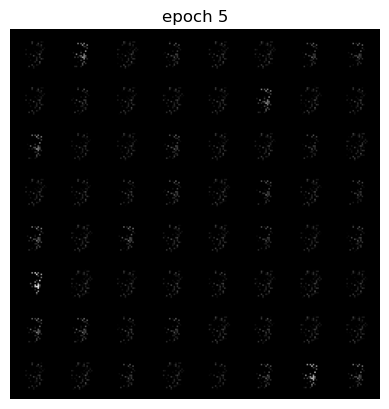

Epoch 5 of 100
Generator loss: 3.27802651, Discriminator loss: 0.36156628


118it [00:17,  6.84it/s]                         


Epoch 6 of 100
Generator loss: 4.17925369, Discriminator loss: 0.27379651


118it [00:16,  6.95it/s]                         


Epoch 7 of 100
Generator loss: 3.60895628, Discriminator loss: 0.23255573


118it [00:16,  6.97it/s]                         


Epoch 8 of 100
Generator loss: 4.02634788, Discriminator loss: 0.23107459


118it [00:17,  6.88it/s]                         


Epoch 9 of 100
Generator loss: 4.88900432, Discriminator loss: 0.14962969


118it [00:17,  6.83it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


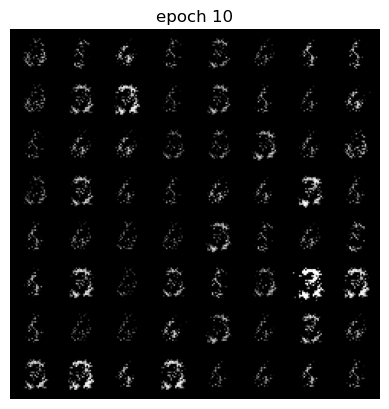

Epoch 10 of 100
Generator loss: 4.68622302, Discriminator loss: 0.15878269


118it [00:17,  6.89it/s]                         


Epoch 11 of 100
Generator loss: 4.53466366, Discriminator loss: 0.16870842


118it [00:16,  6.95it/s]                         


Epoch 12 of 100
Generator loss: 4.06286883, Discriminator loss: 0.18995345


118it [00:17,  6.88it/s]                         


Epoch 13 of 100
Generator loss: 4.15762056, Discriminator loss: 0.17021897


118it [00:17,  6.92it/s]                         


Epoch 14 of 100
Generator loss: 3.90406046, Discriminator loss: 0.20394812


118it [00:17,  6.89it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


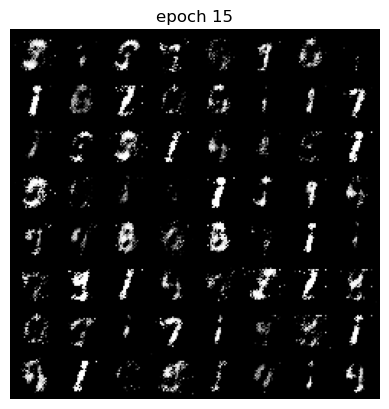

Epoch 15 of 100
Generator loss: 4.00642199, Discriminator loss: 0.17717598


118it [00:17,  6.92it/s]                         


Epoch 16 of 100
Generator loss: 4.21542486, Discriminator loss: 0.17338329


118it [00:18,  6.51it/s]                         


Epoch 17 of 100
Generator loss: 4.05346420, Discriminator loss: 0.17702835


118it [00:17,  6.92it/s]                         


Epoch 18 of 100
Generator loss: 3.94231403, Discriminator loss: 0.18616152


118it [00:17,  6.90it/s]                         


Epoch 19 of 100
Generator loss: 3.60898276, Discriminator loss: 0.20039932


118it [00:16,  6.95it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


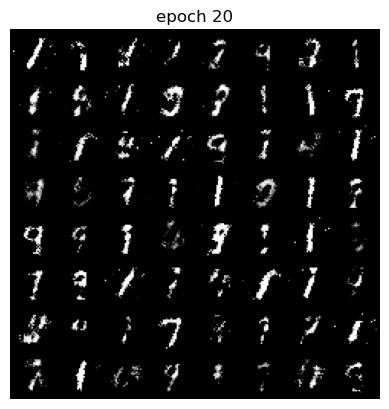

Epoch 20 of 100
Generator loss: 3.61220029, Discriminator loss: 0.20344794


118it [00:18,  6.44it/s]                         


Epoch 21 of 100
Generator loss: 3.62739375, Discriminator loss: 0.20459508


118it [00:18,  6.53it/s]                         


Epoch 22 of 100
Generator loss: 3.38646798, Discriminator loss: 0.23699877


118it [00:17,  6.58it/s]                         


Epoch 23 of 100
Generator loss: 3.21644673, Discriminator loss: 0.24269400


118it [00:17,  6.58it/s]                         


Epoch 24 of 100
Generator loss: 3.00594196, Discriminator loss: 0.27002923


118it [00:17,  6.58it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


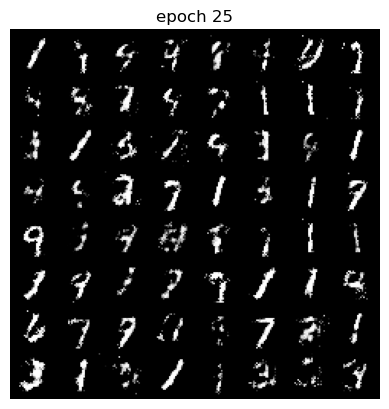

Epoch 25 of 100
Generator loss: 2.89899708, Discriminator loss: 0.28350576


118it [00:18,  6.48it/s]                         


Epoch 26 of 100
Generator loss: 2.76922001, Discriminator loss: 0.30117182


118it [00:18,  6.22it/s]                         


Epoch 27 of 100
Generator loss: 2.70563173, Discriminator loss: 0.30902161


118it [00:18,  6.50it/s]                         


Epoch 28 of 100
Generator loss: 2.57829753, Discriminator loss: 0.33428823


118it [00:18,  6.26it/s]                         


Epoch 29 of 100
Generator loss: 2.50998296, Discriminator loss: 0.34481330


118it [00:18,  6.42it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


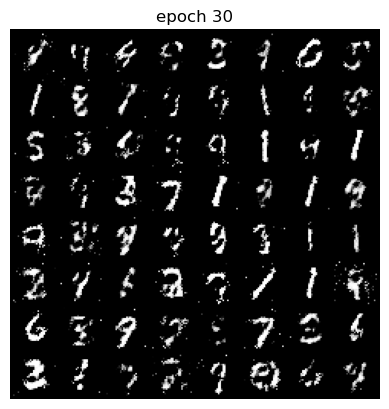

Epoch 30 of 100
Generator loss: 2.24004201, Discriminator loss: 0.38736085


118it [00:17,  6.61it/s]                         


Epoch 31 of 100
Generator loss: 2.20369603, Discriminator loss: 0.39677078


118it [00:18,  6.51it/s]                         


Epoch 32 of 100
Generator loss: 2.20652152, Discriminator loss: 0.38955299


118it [00:18,  6.47it/s]                         


Epoch 33 of 100
Generator loss: 2.12852604, Discriminator loss: 0.40512970


118it [00:17,  6.57it/s]                         


Epoch 34 of 100
Generator loss: 2.07632057, Discriminator loss: 0.41636053


118it [00:17,  6.65it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


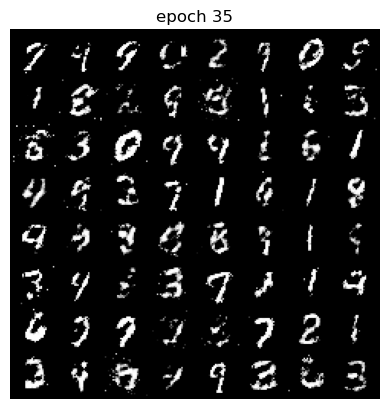

Epoch 35 of 100
Generator loss: 2.00247385, Discriminator loss: 0.42508051


118it [00:17,  6.62it/s]                         


Epoch 36 of 100
Generator loss: 2.00399405, Discriminator loss: 0.42488700


118it [00:17,  6.64it/s]                         


Epoch 37 of 100
Generator loss: 1.88835883, Discriminator loss: 0.44443929


118it [00:17,  6.70it/s]                         


Epoch 38 of 100
Generator loss: 1.86253934, Discriminator loss: 0.45340463


118it [00:17,  6.56it/s]                         


Epoch 39 of 100
Generator loss: 1.79533451, Discriminator loss: 0.46444955


118it [00:17,  6.67it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


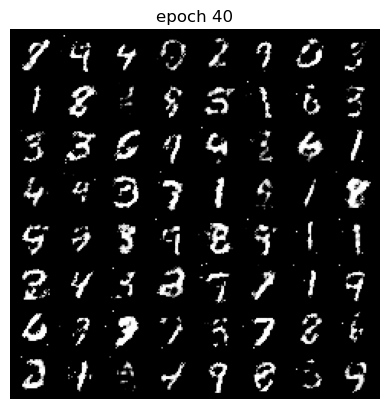

Epoch 40 of 100
Generator loss: 1.76028716, Discriminator loss: 0.46648998


118it [00:19,  6.17it/s]                         


Epoch 41 of 100
Generator loss: 1.72089529, Discriminator loss: 0.47601241


118it [00:18,  6.28it/s]                         


Epoch 42 of 100
Generator loss: 1.68841095, Discriminator loss: 0.48216668


118it [00:18,  6.31it/s]                         


Epoch 43 of 100
Generator loss: 1.64101673, Discriminator loss: 0.48900020


118it [00:18,  6.31it/s]                         


Epoch 44 of 100
Generator loss: 1.58735288, Discriminator loss: 0.49913981


118it [00:18,  6.29it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


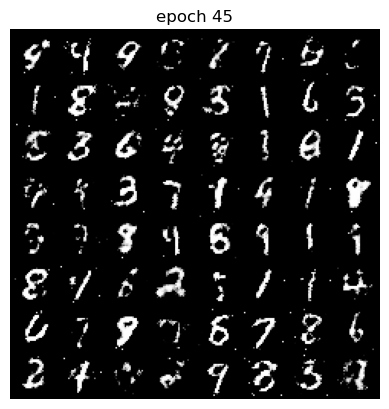

Epoch 45 of 100
Generator loss: 1.59493965, Discriminator loss: 0.49839929


118it [00:18,  6.29it/s]                         


Epoch 46 of 100
Generator loss: 1.55771299, Discriminator loss: 0.50238661


118it [00:18,  6.27it/s]                         


Epoch 47 of 100
Generator loss: 1.48994504, Discriminator loss: 0.51400370


118it [00:18,  6.35it/s]                         


Epoch 48 of 100
Generator loss: 1.44348196, Discriminator loss: 0.52305715


118it [00:18,  6.26it/s]                         


Epoch 49 of 100
Generator loss: 1.40376447, Discriminator loss: 0.53061332


118it [00:18,  6.38it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


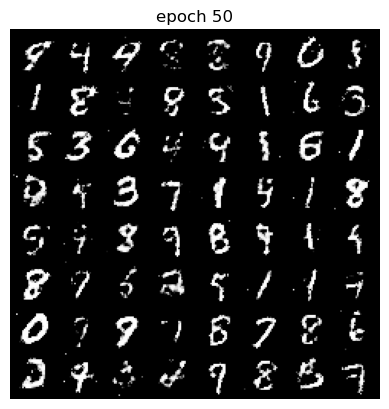

Epoch 50 of 100
Generator loss: 1.36732347, Discriminator loss: 0.53789342


118it [00:18,  6.35it/s]                         


Epoch 51 of 100
Generator loss: 1.31882819, Discriminator loss: 0.54668319


118it [00:18,  6.32it/s]                         


Epoch 52 of 100
Generator loss: 1.28828868, Discriminator loss: 0.55098178


118it [00:18,  6.36it/s]                         


Epoch 53 of 100
Generator loss: 1.27296968, Discriminator loss: 0.55358916


118it [00:18,  6.33it/s]                         


Epoch 54 of 100
Generator loss: 1.24261284, Discriminator loss: 0.55569755


118it [00:18,  6.40it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


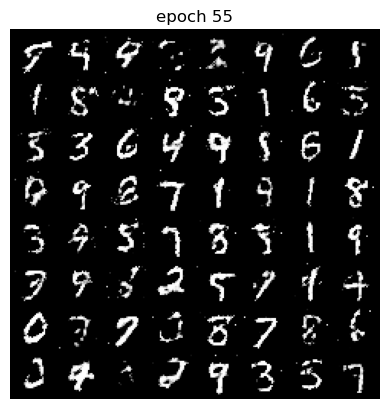

Epoch 55 of 100
Generator loss: 1.24565552, Discriminator loss: 0.55253987


118it [00:18,  6.39it/s]                         


Epoch 56 of 100
Generator loss: 1.20482291, Discriminator loss: 0.56046169


118it [00:18,  6.34it/s]                         


Epoch 57 of 100
Generator loss: 1.18092017, Discriminator loss: 0.56770459


118it [00:18,  6.37it/s]                         


Epoch 58 of 100
Generator loss: 1.16418948, Discriminator loss: 0.56380554


118it [00:18,  6.33it/s]                         


Epoch 59 of 100
Generator loss: 1.10904737, Discriminator loss: 0.57374650


118it [00:18,  6.30it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


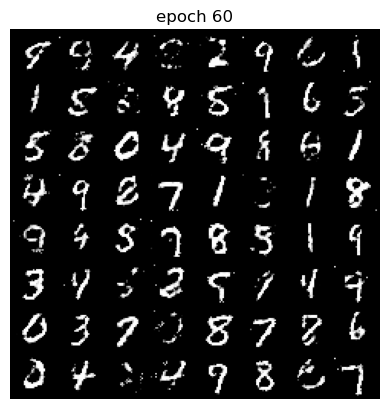

Epoch 60 of 100
Generator loss: 1.10327942, Discriminator loss: 0.57512840


118it [00:19,  6.07it/s]                         


Epoch 61 of 100
Generator loss: 1.07847673, Discriminator loss: 0.57581863


118it [00:19,  6.01it/s]                         


Epoch 62 of 100
Generator loss: 1.06926986, Discriminator loss: 0.57586689


118it [00:19,  6.06it/s]                         


Epoch 63 of 100
Generator loss: 1.03749413, Discriminator loss: 0.58027778


118it [00:19,  6.03it/s]                         


Epoch 64 of 100
Generator loss: 1.00858834, Discriminator loss: 0.58209738


118it [00:19,  6.11it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


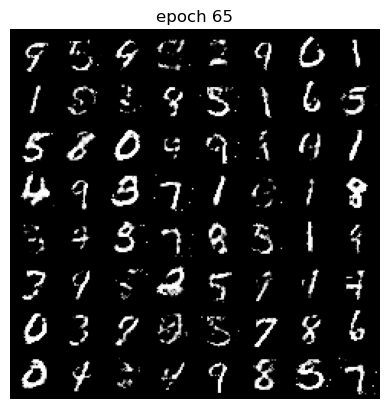

Epoch 65 of 100
Generator loss: 0.97319290, Discriminator loss: 0.58617738


118it [00:19,  6.00it/s]                         


Epoch 66 of 100
Generator loss: 0.96836104, Discriminator loss: 0.58432098


118it [00:19,  6.12it/s]                         


Epoch 67 of 100
Generator loss: 0.94489807, Discriminator loss: 0.58463529


118it [00:19,  6.07it/s]                         


Epoch 68 of 100
Generator loss: 0.91368683, Discriminator loss: 0.59064894


118it [00:19,  5.97it/s]                         


Epoch 69 of 100
Generator loss: 0.90758767, Discriminator loss: 0.58488001


118it [00:19,  6.11it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


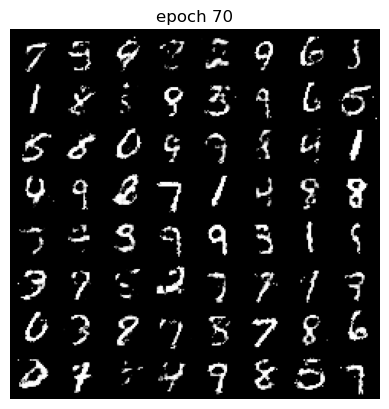

Epoch 70 of 100
Generator loss: 0.88992586, Discriminator loss: 0.58512818


118it [00:19,  6.14it/s]                         


Epoch 71 of 100
Generator loss: 0.87420458, Discriminator loss: 0.58250373


118it [00:19,  6.14it/s]                         


Epoch 72 of 100
Generator loss: 0.84236780, Discriminator loss: 0.58453017


118it [00:19,  6.10it/s]                         


Epoch 73 of 100
Generator loss: 0.81009263, Discriminator loss: 0.58840141


118it [00:19,  6.13it/s]                         


Epoch 74 of 100
Generator loss: 0.80646202, Discriminator loss: 0.58472198


118it [00:19,  6.21it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


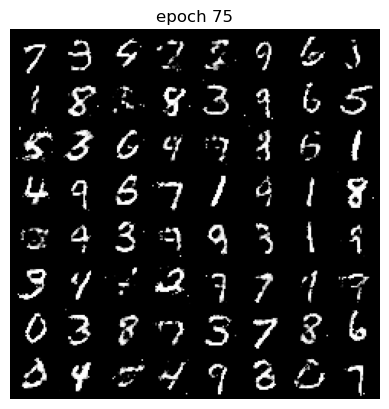

Epoch 75 of 100
Generator loss: 0.78853140, Discriminator loss: 0.57991722


118it [00:19,  6.19it/s]                         


Epoch 76 of 100
Generator loss: 0.76603035, Discriminator loss: 0.57900246


118it [00:19,  6.18it/s]                         


Epoch 77 of 100
Generator loss: 0.74578512, Discriminator loss: 0.57555365


118it [00:19,  6.14it/s]                         


Epoch 78 of 100
Generator loss: 0.72217875, Discriminator loss: 0.57330943


118it [00:18,  6.23it/s]                         


Epoch 79 of 100
Generator loss: 0.69203937, Discriminator loss: 0.57280489


118it [00:18,  6.23it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


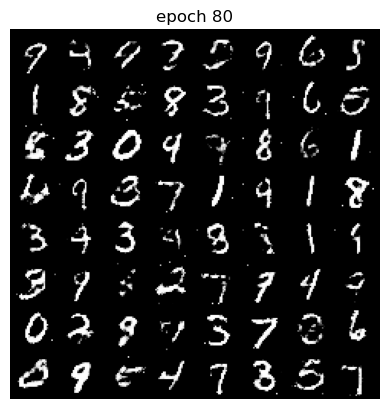

Epoch 80 of 100
Generator loss: 0.67615351, Discriminator loss: 0.56880169


118it [00:19,  5.90it/s]                         


Epoch 81 of 100
Generator loss: 0.67140662, Discriminator loss: 0.56126469


118it [00:20,  5.88it/s]                         


Epoch 82 of 100
Generator loss: 0.63508602, Discriminator loss: 0.55984794


118it [00:20,  5.84it/s]                         


Epoch 83 of 100
Generator loss: 0.62378006, Discriminator loss: 0.55172698


118it [00:20,  5.89it/s]                         


Epoch 84 of 100
Generator loss: 0.60086922, Discriminator loss: 0.54884593


118it [00:20,  5.88it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


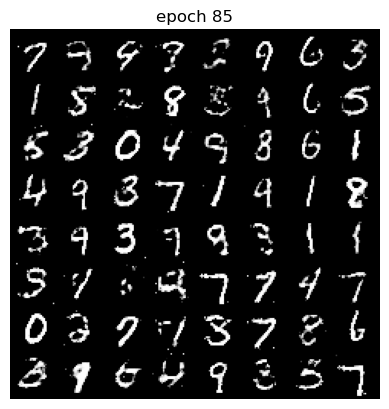

Epoch 85 of 100
Generator loss: 0.59016249, Discriminator loss: 0.53703836


118it [00:20,  5.86it/s]                         


Epoch 86 of 100
Generator loss: 0.55759736, Discriminator loss: 0.53462125


118it [00:20,  5.85it/s]                         


Epoch 87 of 100
Generator loss: 0.53737272, Discriminator loss: 0.52667458


118it [00:19,  5.92it/s]                         


Epoch 88 of 100
Generator loss: 0.51484153, Discriminator loss: 0.51753092


118it [00:19,  5.93it/s]                         


Epoch 89 of 100
Generator loss: 0.48842289, Discriminator loss: 0.50948455


118it [00:20,  5.88it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


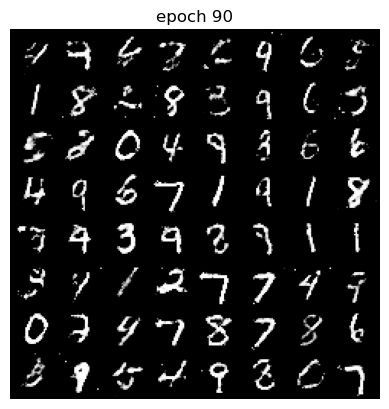

Epoch 90 of 100
Generator loss: 0.46323729, Discriminator loss: 0.49972322


118it [00:19,  5.91it/s]                         


Epoch 91 of 100
Generator loss: 0.44956632, Discriminator loss: 0.48524408


118it [00:19,  5.95it/s]                         


Epoch 92 of 100
Generator loss: 0.42170450, Discriminator loss: 0.47408254


118it [00:19,  5.98it/s]                         


Epoch 93 of 100
Generator loss: 0.40502680, Discriminator loss: 0.45822822


118it [00:19,  5.97it/s]                         


Epoch 94 of 100
Generator loss: 0.37760456, Discriminator loss: 0.44189924


118it [00:20,  5.89it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


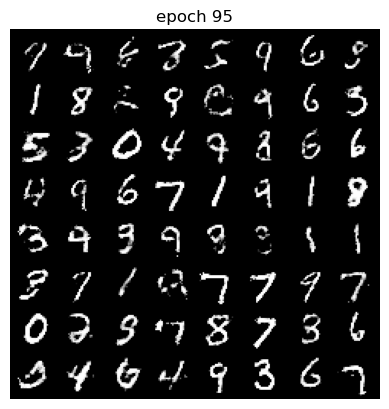

Epoch 95 of 100
Generator loss: 0.34909453, Discriminator loss: 0.42693743


118it [00:19,  5.97it/s]                         


Epoch 96 of 100
Generator loss: 0.32444113, Discriminator loss: 0.40979299


118it [00:19,  6.03it/s]                         


Epoch 97 of 100
Generator loss: 0.29599856, Discriminator loss: 0.38969793


118it [00:19,  6.00it/s]                         


Epoch 98 of 100
Generator loss: 0.27114066, Discriminator loss: 0.36436015


118it [00:19,  5.93it/s]                         


Epoch 99 of 100
Generator loss: 0.24793485, Discriminator loss: 0.33861900


118it [00:19,  6.08it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


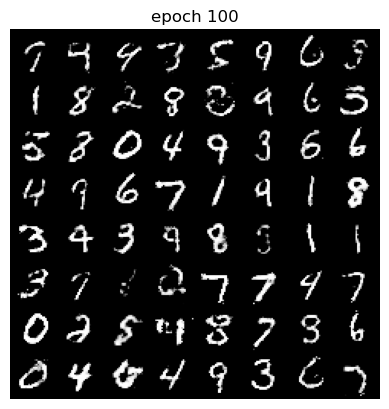

Epoch 100 of 100
Generator loss: 0.21657734, Discriminator loss: 0.31163355


In [14]:
import math

torch.manual_seed(7777)

def generator_loss(output, true_label):
    ############ YOUR CODE HERE ##########
    optim_g.zero_grad()
    loss = criterion(output, true_label)
    loss.backward()
    return loss.item()
    
    
    ######################################
    
def discriminator_loss(output, true_label):
    ############ YOUR CODE HERE ##########
    #print(output.shape)
    optim_d.zero_grad()
    loss = criterion(output, true_label)
    loss.backward()
    return loss.item()
    
    
    ######################################

for epoch in range(epochs):
    loss_g = 0.0
    loss_d = 0.0
    factor_m = (2*(epochs-epoch)) / epochs + 0.1
    factor_c = factor_m#(2*epoch) / epochs
    internal_k = math.floor((2*(epoch))/40+3)
    
    for bi, data in tqdm(enumerate(train_loader), total=int(len(train_data)/train_loader.batch_size)):

        
        # ###  Training discriminator ####
        # 1. Generate fake data
        real_batch_size = data[0].shape[0]
        
        misleading_size = math.ceil(real_batch_size*factor_m)
        consideration_size = math.ceil(real_batch_size*factor_c)
        
        for i in range(0, internal_k):
            noisy_input = create_noise(misleading_size, nz)
            fake_samples = generator(noisy_input).to(device)
            fake_labels = label_fake(misleading_size)

            real_samples = data[0].to(device)
            real_labels = label_real(real_batch_size)

            combined_samples = torch.cat((real_samples,fake_samples),0)
            combined_labels = torch.cat((real_labels,fake_labels),0).view(real_batch_size+misleading_size, 1)

            dis_output = discriminator(combined_samples)
            loss_d += discriminator_loss(dis_output, combined_labels)
            optim_d.step()


            # Training generator
            # 1. Generate fake data
            noisy_input2 = create_noise(consideration_size, nz)
            fake_samples2 = generator(noisy_input2).to(device)
            fake_labels2 = (label_real(consideration_size)).view(consideration_size, 1) #We want them to be true
            # 2. Frward and backward
            dis_output2 = discriminator(fake_samples2)
            loss_g += generator_loss(dis_output2, fake_labels2)
            optim_g.step()

    
        ######################################
    
    
    # create the final fake image for the epoch
    generated_img = generator(noise).cpu().detach()
    
    # make the images as grid
    generated_img = make_grid(generated_img)
    
    # visualize generated images
    if (epoch + 1) % 5 == 0:
        plt.imshow(generated_img.permute(1, 2, 0))
        plt.title(f'epoch {epoch+1}')
        plt.axis('off')
        plt.show()
    
    # save the generated torch tensor models to disk
    save_generator_image(generated_img, f"p1c_vs_outputs_tmp/gen_img{epoch+1}.png")
    images.append(generated_img)
    epoch_loss_g = loss_g / bi / internal_k # total generator loss for the epoch
    epoch_loss_d = loss_d / bi / internal_k # total discriminator loss for the epoch
    losses_g.append(epoch_loss_g)
    losses_d.append(epoch_loss_d)
    
    print(f"Epoch {epoch+1} of {epochs}")
    print(f"Generator loss: {epoch_loss_g:.8f}, Discriminator loss: {epoch_loss_d:.8f}")

In [15]:
print('DONE TRAINING')
torch.save(generator.state_dict(), 'p1c_vs_outputs_tmp/generator.pth')

DONE TRAINING


In [16]:
# save the generated images as GIF file
imgs = [np.array(to_pil_image(img)) for img in images]
imageio.mimsave('p1c_vs_outputs_tmp/generator_images.gif', imgs)

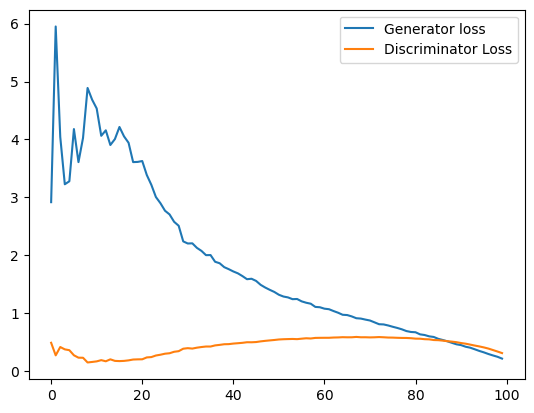

In [17]:
# plot and save the generator and discriminator loss
plt.figure()
plt.plot(losses_g, label='Generator loss')
plt.plot(losses_d, label='Discriminator Loss')
plt.legend()
plt.savefig('p1c_vs_outputs_tmp/loss.png')

In [18]:
import winsound
frequency = 2000  # Set Frequency To 2500 Hertz
duration = 200  # Set Duration To 1000 ms == 1 second
for i in range(0,7):
    winsound.Beep(frequency-i*50, duration+i*50)
losses_g

[2.917169744897093,
 5.950380193541871,
 4.0438330241417955,
 3.2262034586012533,
 3.278026514922791,
 4.179253687546124,
 3.6089562819554253,
 4.02634788170839,
 4.889004322198721,
 4.686223015146717,
 4.534663656158664,
 4.06286883082485,
 4.157620562447442,
 3.9040604642993024,
 4.0064219912232835,
 4.215424857587895,
 4.053464202120094,
 3.9423140331550877,
 3.608982764078341,
 3.612200293445859,
 3.6273937474968085,
 3.386467976957305,
 3.2164467262406635,
 3.005941961056147,
 2.898997081650628,
 2.7692200052432523,
 2.7056317314123497,
 2.578297526663185,
 2.509982964421949,
 2.2400420137450228,
 2.2036960338934874,
 2.2065215245780783,
 2.128526037829554,
 2.07632056515441,
 2.0024738451863966,
 2.0039940519720063,
 1.8883588265659463,
 1.862539335193797,
 1.7953345115877624,
 1.7602871595284877,
 1.720895285076565,
 1.6884109515410202,
 1.6410167292651967,
 1.5873528849365364,
 1.594939645131429,
 1.5577129914210393,
 1.4899450391785711,
 1.4434819612747583,
 1.4037644693994114